In [69]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
df = pd.read_parquet('/Users/dabiyyu/Downloads/mlopszoomcamp/modul 1/fhv_tripdata_2021-01.parquet')

# records for january
df.shape

(1154112, 7)

In [71]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [72]:
# average trip duration
df.duration.mean()

19.1672240937939

<AxesSubplot:>

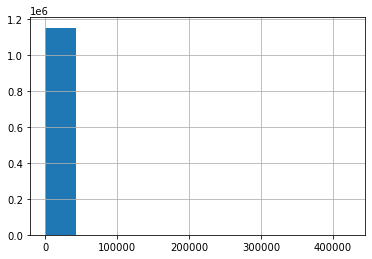

In [73]:
df.duration.hist()

In [74]:
df = df[(df.duration >= 1) & (df.duration <= 60)]
df.shape

(1109826, 8)

<AxesSubplot:>

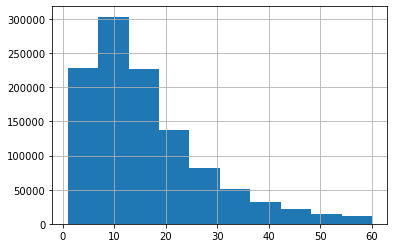

In [75]:
df.duration.hist()

In [76]:
print(f'dropped {1154112-1109826} records')

dropped 44286 records


In [77]:
categorical = ['PUlocationID', 'DOlocationID']

In [78]:
df[categorical] = df[categorical].fillna(-1)

In [79]:
df[categorical] = df[categorical].astype(str)

In [80]:
# missing pickup location ID
len(df[df['PUlocationID']=='-1.0'])/len(df)*100

83.52732770722618

In [81]:
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

# train RMSE
mean_squared_error(y_train, y_pred, squared=False)

10.528519107206316

In [82]:
# dimentionality of matrix
X_train.shape

(1109826, 525)

In [83]:
df_val = pd.read_parquet('/Users/dabiyyu/Downloads/mlopszoomcamp/modul 1/fhv_tripdata_2021-02.parquet')

In [84]:
df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds()/60)

In [85]:
df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]

In [86]:
df_val[categorical] = df_val[categorical].fillna(-1)
df_val[categorical] = df_val[categorical].astype(str)

In [87]:
val_dicts = df_val[categorical].to_dict(orient='records')

X_val = dv.transform(val_dicts)

y_val = df_val[target].values

y_pred = lr.predict(X_val)

# validation RMSE
mean_squared_error(y_val, y_pred, squared=False)

11.014283149347039